<a href="https://colab.research.google.com/github/fdluiuc/lecture-notebooks/blob/master/01a-linear-algebra-with-numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview 

Within this notebook, we introduce different linear algebra operations in Python using the [NumPy library](https://numpy.org/). NumPy is advantageous to use for its numerical stability and access to lower-level matrix operations through a Basic Linear Algebra Subprograms (BLAS). 

For more details, please see NumPy's documentation:

- <https://numpy.org/doc/stable/reference/index.html>

For help with writing in the MathJax flavor of $\LaTeX$, please see: 

- <https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference>

### (Hidden) LaTeX command preamble 

$$
% Define a bordermatrix with top and left-oriented labels
\newcommand{lbordermatrix}[3]{
  \begin{matrix} & \begin{matrix} #1 \end{matrix} \\
  \begin{matrix} #2 \end{matrix} 
  \hspace{-1em} & #3 
  \end{matrix}
}
% Define a dependency on the color package for MathJax to load it
\require{color} 
% Add macro commands for matrix coloring
\newcommand{\highlightcolor}[2]{\colorbox{#1}{$\displaystyle #2$}}
\newcommand{\highlightcol}[1]{\colorbox{yellow}{$\displaystyle #1$}}
\newcommand{\highlightrow}[1]{\colorbox{lightblue}{$\displaystyle #1$}}
% Experimental highlighting with CSS thrown in.
\newcommand{\highlightbb}[1]{\bbox[orange,5px,border:2px solid red]{#1}}
$$


<!-- 
Misc: MathJax doesn't support \bordermatrix, so we must embed a new command.
c.f. https://github.com/mathjax/MathJax/issues/2031
 -->

## Diagnostics


In [ ]:
#@title (Hidden) Diagnostic Check
import os
import sys
import pandas as pd
import numpy as np
%tensorflow_version 2.x
import statsmodels 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib
import matplotlib.pyplot as plt

print(f"\nPython environment:\n{sys.version}")
print("\nStatistical packages loaded: ")
print(f"pandas: {pd.__version__}")
print(f"numpy: {np.__version__}")
print(f"statsmodels: {statsmodels.__version__}")
print(f"matplotlib: {matplotlib.__version__}")

print(f"\nRuntime location:")
try:
  from google.colab import drive
  is_google_colab = True
  print("Notebook is on Google CoLab")
except:
  is_google_colab = False
  print("Notebook is being run locally or through another source.")



Python environment:
3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]

Statistical packages loaded: 
pandas: 1.1.5
numpy: 1.19.5
statsmodels: 0.10.2
matplotlib: 3.2.2

Runtime location:
Notebook is on Google CoLab


## Save a copy of this notebook!!

Before we get started, it is crucially important that you **save a copy of the notebook** to your Google Drive! Please go to: 

```
File -> Save a Copy in Drive
```



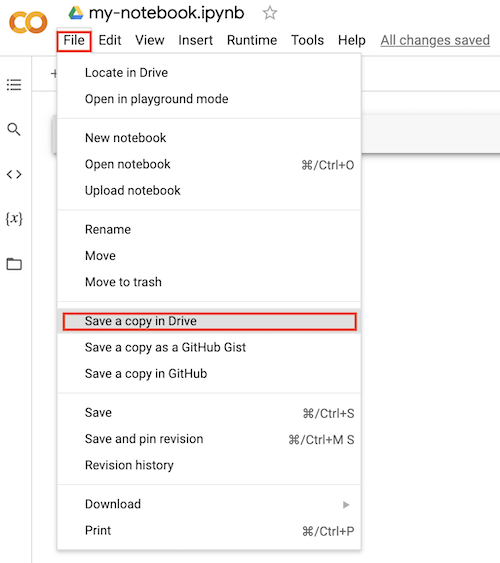

**If you _forget_ to save a copy of the notebook, all of your work will be lost when you close out of Google Colab.**

# Linear algebra

To begin, we note that NumPy is an external package. Thus, we'll load the `NumPy` package under the namespace `np`.

In [ ]:
import numpy as np

From here, we'll look at: 

- **Scalars:** A single number
- **Vectors:** An array of numbers
- **Matrices:** A two dimensional (2D) array of numbers. 
- **Tensors:** An _p_-dimensional array with $p > 2$.


## Scalars

Scalar values represent a single value. In practice, this would be saying:

$$a = 1$$

Scalars can take on many different types:

- boolean: `True` or `False`
- integers or whole numbers: -42, -1, 0, 5, 32
- double, float, or decimal numbers: -1.2, 0.0, .66666, 3.14

For an extended overview of different data types for NumPy's scalar support please see: <https://numpy.org/doc/stable/user/basics.types.html>



### Working with Scalars in NumPy

Let's try different algebraic operations with two integer values or whole numbers, $x$ and $y$:

In [ ]:
# Integers
x = np.int64(2)
y = np.int64(3)

print('x + y = ', x + y)
print('x * y = ', x * y)
print('x / y = ', x / y)
print('x ** y = ', np.power(x,y))

x + y =  5
x * y =  6
x / y =  0.6666666666666666
x ** y =  8


What if we had a decimal number? 

In [ ]:
# Doubles
x = np.float64(1.1)
y = np.float64(2.5)

print('x + y = ', x + y)
print('x * y = ', x * y)
print('x / y = ', x / y)
print('x ** y = ', np.power(x,y))

x + y =  3.6
x * y =  2.75
x / y =  0.44000000000000006
x ** y =  1.2690587062858836


How could you tell if a NumPy object was scalar? Check if the object's:

1. Dimensions are 0
1. Size is 1
1. Shape is an empty tuple, e.g. `()`.

In [ ]:
# Sample of a single scalar value
a = np.int64(1)

# Number of Dimensions
a.ndim

0

In [ ]:
# Number of Elements
a.size 

1

In [ ]:
# See tuple of Array Dimensions
a.shape

()

## Vectors

Vectors are arrays of numbers e.g.

$$\mathbf{x}_{n \times 1} = \begin{bmatrix} x_1 \\ x_2 \\ \cdots \\ x_n \end{bmatrix}_{n \times 1}$$

Depending on the dimensions of the vector, it can either be **row** or **column**-based. This can be determined by looking at dimensions of the vector. Frequently, the dimensions will be written as a subscript next to
the name of the vector variable. 

For instance, the original example would be a **column** vector.

In the case of a _row_ vector, we would need: 

$$\mathbf{x}_{1 \times n} = \begin{bmatrix} x_1 & x_2 & \cdots & x_n \end{bmatrix}_{1 \times n}$$

As an example, consider the collection of numbers given as $1, 2, 3, 4$.

They could be arrange as either:

$$\begin{align}
\mathbf{x}_{4 \times 1} &= \begin{bmatrix} 1 \\ 2 \\ 3 \\ 4 \end{bmatrix}_{4 \times 1} \\
&\text{Or} \\
\mathbf{x}_{1 \times 4} &= \begin{bmatrix} 1 & 2 & 3 & 4 \end{bmatrix}_{4 \times 1}
\end{align}$$




### Vectors in NumPy

If they are implemented in NumPy, we would have:


In [ ]:
x = np.array([[1], [2], [3], [4]])
print(f"x is a column vector with dimensions {x.shape} and elements:\n {x}")

x is a column vector with dimensions (4, 1) and elements:
 [[1]
 [2]
 [3]
 [4]]


**Note:** In this format, each element (or row) is denoted by square brackets, e.g.`[]` around the value. These elements are then grouped together by another square bracket, e.g. `[[1], [2]]` gives `[[1], [2]]`.

Next, we consider the **row-vector** format: 

In [ ]:
x = np.array([1, 2, 3, 4])
print(f"x is a row vector with dimensions {x.shape} and elements:\n {x}")

x is a row vector with dimensions (4,) and elements:
 [1 2 3 4]


What? Why isn't NumPy adding a second dimension in comparison to the column-vector? 

**Short version:** Only one "view"/set of indices is required to describe elements in a row-vector as it is mainly a collection of elements. Meanwhile, in a column-vector there are
two sets of indices required to describe the row and the column location of an element despite the column location being fixed to 1. 

Sometimes this property is desirable. Other times, one would seek to create a new view that has two indices. This is possible using the [`.reshape()`](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html) method.

In [ ]:
y = x.reshape((1, x.shape[0]))
print(f"y is a row vector with dimensions {y.shape} and elements:\n {y}")

y is a row vector with dimensions (1, 4) and elements:
 [[1 2 3 4]]


**Note:** `y` now has two dimensions and as such displays elements surrounded by double brackets, e.g. `[[ ]]`, which indicate two indices are now present. 

### Accessing a single vector-value.

Recall that Python uses a zero-based indexing system. Thus, we have indices setup as:

```
index =     0    1    2    3    
         ┌────┬────┬────┬────┐
    x =  │  2 │  4 │  9 │  5 │
         └────┴────┴────┴────┘
```

So, to retrieve the third-value, we would need to use `2` as the position. 


In [ ]:
# Create a series of vectors
x = np.array([2, 4, 9, 5])

# Retrieve third value
x_3 = x[2]

print(f"Third value of x is {x_3}")

Third value of x is 9


To access the first element, we would use `0`:

In [ ]:
# Retrieve first value in the vector
x_1 = x[0]

print(f"First value of x is {x_1}")

First value of x is 2


#### Your Turn: Vector Access

Consider a vector with $m$ values. How could one retrieve the last value?

In [ ]:
## code here

### Creating Ranges or Sequences

Frequently, you may wish to create a series of increasing values. Generally, constructing such a vector by-hand can be problematic.

In [ ]:
x = np.arange(4) + 1
print(f"x = {x}") 

# equivalent to
y = np.array([1, 2, 3, 4])
print(f"y = {y}")

x = [1 2 3 4]
y = [1 2 3 4]


#### Your Turn: Matching indices

Why was the plus 1 (`+ 1`) added after `np.arange(4)`? 


In [ ]:
## code here

### Element-wise algebraic operations 


Vectors have a nice property of being able to _apply_ a mathematical operations
across all elements in a succient manner. 
We'll see later that this enables faster operations through parallelization (or perform actions simultaneously instead of one-after-another). For now, note that
standard operations are possible on an element-wise basis or the same location in each vector is operated on. Let's examine some possible "a x plus y" ("AXPY") operations.

For instance, we have element-wise addition: 


$$\begin{align}
\mathbf{x}_{4 \times 1} &= \begin{bmatrix} 1 \\ 2 \\ 3 \\ 4 \end{bmatrix}_{4 \times 1}, \mathbf{y}_{4 \times 1} = \begin{bmatrix} 5 \\ 6 \\ 7 \\ 8 \end{bmatrix}_{4 \times 1} \\ 
\mathbf{x}_{4 \times 1} + \mathbf{y}_{4 \times 1} &= \begin{bmatrix} 1 \\ 2 \\ 3 \\ 4 \end{bmatrix}_{4 \times 1} + \begin{bmatrix} 5 \\ 6 \\ 7 \\ 8 \end{bmatrix}_{4 \times 1} = \begin{bmatrix} 1 + 5 \\ 2 + 6 \\ 3 + 7 \\ 4 + 8 \end{bmatrix}_{4 \times 1} = \begin{bmatrix} 6 \\ 8 \\ 10 \\ 12 \end{bmatrix}_{4 \times 1} \\ 
\end{align}$$


In the case of a scalar-vector multiplication, one would have:

$$\begin{align}
a &= 3 \\
a \mathbf{x}_{4 \times 1} &= a\begin{bmatrix} 1 \\ 2 \\ 3 \\ 4 \end{bmatrix}_{4 \times 1} = \begin{bmatrix} a \\ 2a \\ 3a \\ 4a \end{bmatrix}_{4 \times 1} = \begin{bmatrix} 3 \\ 6 \\ 9 \\ 12 \end{bmatrix}_{4 \times 1} \\
\end{align}$$

Lastly, we can perform subtraction in an "a x plus y" ("AXPY") operation with:

$$\begin{align}
a &= -1 \\
a \mathbf{x}_{4 \times 1} + \mathbf{y}_{4 \times 1} &= (-1)\begin{bmatrix} 1 \\ 2 \\ 3 \\ 4 \end{bmatrix}_{4 \times 1} + \begin{bmatrix} 5 \\ 6 \\ 7 \\ 8 \end{bmatrix}_{4 \times 1} = \begin{bmatrix} -1 + 5 \\ -2 + 6 \\ -3 + 7 \\ -4 + 8 \end{bmatrix}_{4 \times 1} = \begin{bmatrix} 4 \\ 4 \\ 4 \\ 4 \end{bmatrix}_{4 \times 1} \\ 
\end{align}$$




In [ ]:
a = 3
x = np.arange(4) + 1
print(f"x has:\n {x}")
y = np.arange(5, 9, 1)
print(f"y has:\n {y}")

print(f"a * x: \n {a * x}")

a = -1
print(f"a * x + y: \n {a * x + y}")

x has:
 [1 2 3 4]
y has:
 [5 6 7 8]
a * x: 
 [ 3  6  9 12]
a * x + y: 
 [4 4 4 4]


### Transposition

Taking the transpose of a vector will change it shape. Fundamentally, the transpose of a row vector is a column vector and vice versa.

Consider: 

$$
\begin{align}
\mathbf{x}_{1 \times n} &= \begin{bmatrix}
x_1 & x_2 & \cdots & x_n
\end{bmatrix}_{1 \times n} \\
&\text{Taking the tranpose} \\
\mathbf{x}^T_{n \times 1} &= \begin{bmatrix}
x_1 \\ x_2 \\ \cdots \\ x_n
\end{bmatrix}_{n \times 1}
\end{align}
$$


In [ ]:
# Construct a 2D vector sequence
x = np.arange(1, 5, 1)[np.newaxis]
print(f"x: \n {x} \n")

# Take the tranpose
x_tranpose = x.T
print(f"x_tranpose: \n {x_tranpose} \n")

# Observe shape dimension
print(f"x shape is {x.shape} and x_tranpose shape is {x_tranpose.shape}")

x: 
 [[1 2 3 4]] 

x_tranpose: 
 [[1]
 [2]
 [3]
 [4]] 

x shape is (1, 4) and x_tranpose shape is (4, 1)


**Note:** `[np.newaxis]` adds a second index without having to use `.reshape()`. 

## Matrices

Matrices consist of a series of vectors aligned either by orientation (row or column) to form a two-dimensional (2D) object. 

In the matrix $\mathbf{A}$, we have the entry $a_{ij}$ representing the $i$-th row and $j$-th column. In a 1-based indexing system, we have:


$$\mathbf{A} = 
\begin{bmatrix}
 a_{11} & a_{12} & \cdots & a_{1m} \\
 a_{21} & a_{22} & \cdots & a_{2m} \\
\vdots & \vdots & \ddots & \vdots \\
 a_{n1} & a_{n2} & \cdots & a_{nm} \\
\end{bmatrix}_{n \times m}
$$

However, the indexes here are not representative of the 0-based indexing system in Python. Instead, each index value must be 1 less from both the desired row and column.

$$
\mathbf{A}_{4 \times 4} = \lbordermatrix{
  % columns
  \hphantom{{0}}0\hphantom{{00}} & 
  1\hphantom{{00}} & 
  2\hphantom{{00}} & 
  3\hphantom{{00}}
}{0 \\ 1 \\ 2 \\ 3}{
  \begin{bmatrix} 
   a_{00} & a_{01} & a_{02} & a_{03} \\
   a_{10} & a_{11} & a_{12} & a_{13} \\ 
   a_{20} & a_{21} & a_{22} & a_{23} \\
   a_{30} & a_{31} & a_{32} & a_{33} 
  \end{bmatrix}
}_{4 \times 4}
$$

**Note:** $a_{11}$ would be found at $a_{00}$ in NumPy.

Having said this, we consider all matrix entries be operating in the real numberspace, e.g. $a_{ij} \in \mathbb{R}^{n \times m}$.

### Matrices in NumPy

NumPy offers `np.array()` and `np.matrix()` to construct 2-dimensional matrices. Even when constructing matrices, the preferred approach is to use `np.array()` with appropriate square brackets setting columns and rows. 

**Note:** `np.matrix()` is scheduled to be [removed in the future](https://numpy.org/doc/stable/reference/generated/numpy.matrix.html).

Matrices are constructed by first using a set of square brackets, e.g. `[]`, to denote the matrix. From there, the matrix is constructed by systematically adding rows grouped together by square brackets. Consider the following matrix:

$$\mathbf{A} = 
\begin{bmatrix}
 1 & 2 & 3 \\
 4 & 5 & 6 \\
\end{bmatrix}_{2 \times 3}
$$

This could be created with:

In [ ]:
A = np.array(
    [           # Start matrix
     [1, 2, 3], # Row 1
     [4, 5, 6]  # Row 2
    ]           # End matrix
  )
print(f"Matrix A looks like:\n {A}")

Matrix A looks like:
 [[1 2 3]
 [4 5 6]]


When testing code, constructing matrices with ranges set to specific dimensions is useful. In this case, the `.reshape()` method enables a 1D vector from `np.arange()` to be structured in a two-dimensional view. 

In [ ]:
# Long way
A = np.array(
    [                     # Start matrix
     [0, 1, 2, 3, 4],     # Row 1
     [5, 6, 7, 8, 9],     # Row 2
     [10, 11, 12, 13, 14],# Row 3
     [15, 16, 17, 18, 19] # Row 4
    ]                     # End matrix
  )
print(f"Matrix A looks like:\n {A}\n")

# Concise way
A = np.arange(20).reshape((4,5))
print(f"Matrix A generated by reshaping:\n {A}")

Matrix A looks like:
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]

Matrix A generated by reshaping:
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]


### Creating Special Matrices (ones, zeros, random values, ...)

There are times when matrices should be filled with specific values for all elements. For those cases, consider using:

- `np.ones()` for a vector of ones.
- `np.zeros()` for a vector of zeros.

Each function takes either a single integer to generate a vector or a **tuple** containing the dimensions of the matrix. For instance, `(3, 2)` would generate a matrix with 3 rows and 2 columns.

In [ ]:
W_matrix = np.ones((3, 2))
print(f"W_matrix of ones:\n{W_matrix}\n")

x_vec = np.ones(3)
print(f"x_vec of ones: {x_vec}\n")

Y_matrix = np.zeros((3, 2))
print(f"Y_matrix of zeros:\n{Y_matrix}\n")

z_vec = np.zeros(3)
print(f"z_vec of zeros: {z_vec}")

W_matrix of ones:
[[1. 1.]
 [1. 1.]
 [1. 1.]]

x_vec of ones: [1. 1. 1.]

Y_matrix of zeros:
[[0. 0.]
 [0. 0.]
 [0. 0.]]

z_vec of zeros: [0. 0. 0.]


For random values, consider using: 

- [`np.random.randint()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html): for a vector of random integers.
- [`np.random.rand()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html) for a vector of random samples from a Uniform distribution, `u ~ U[0, 1]`.
- [`np.random.randn()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html): for a vector of random samples from a standard Normal distribution, `Z ~ N[0, 1]`.

To ensure reproducible random numbers, make sure to set a seed using [`np.random.seed(a_number_here)`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.seed.html).

Unlike the prior functions, these functions require each dimension to be written as a function parameter. So, to generate a 2 x 5 matrix, one would use:
`np.random.randfunction(2, 5)`.


Sample random integers

In [ ]:
# Set a seed for reproducibility
np.random.seed(341)

# Sample a random sequence
v_1 = np.random.randint(10, size = 5)
print(f"v_1 = \n {v_1} \n")

# Sample with a different seed
np.random.seed(1512)
v_2 = np.random.randint(10, size = 5)
print(f"v_2 = \n {v_2} \n")

# Sample with the same seed
np.random.seed(1512)
v_3 = np.random.randint(10, size = 5)
print(f"v_3 = \n {v_3} \n")

v_1 = 
 [3 5 3 7 2] 

v_2 = 
 [1 1 5 1 7] 

v_3 = 
 [1 1 5 1 7] 



Sample from a uniform distribution. 

In [ ]:
# Set a seed for reproducibility
np.random.seed(341)

# Sample from a Uniform Distribution, e.g. u ~ U[0, 1]
u = np.random.rand(5)
print(f"u ~ U[0, 1]: \n {u}\n")

# Sample from a Uniform Distribution, e.g. u ~ U[0, 1]
u_mat = np.random.rand(3, 2)
print(f"u_mat ~ U[0, 1]: \n {u_mat}")

u ~ U[0, 1]: 
 [0.2651669  0.92647858 0.72987223 0.93945584 0.81705294]

u_mat ~ U[0, 1]: 
 [[0.80915501 0.07984923]
 [0.03411085 0.16149582]
 [0.85389694 0.45250823]]


Sample from Normal Distribution

In [ ]:
# Set a seed for reproducibility
np.random.seed(1337)

# Sample from a standard Normal distribution, e.g. x ~ N(0, 1)
z = np.random.randn(5)
print(f"z ~ N(0, 1) = \n {z} \n")

# Sample from a Normal distribution with mean 3 and standard deviation 2
# e.g. x ~ N(mu, sigma^2)
mu = 3
sigma = 2
x = sigma * np.random.randn(5) + mu
print(f"x ~ N({mu}, {sigma}^2) = \n {x}")

z ~ N(0, 1) = 
 [-0.70318731 -0.49028236 -0.32181433 -1.75507872  0.20666447] 

x ~ N(3, 2^2) = 
 [-1.02252915  1.88549858  3.67443402  6.09767194  0.25852688]


Be careful which random number function is being used! 

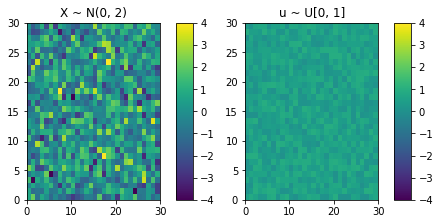

In [ ]:
# Enable plots in notebook
%matplotlib inline

# Import plotting library
import matplotlib.pyplot as plt

# Retrieve color maps
from matplotlib import cm

# Set seed for reproducibility
np.random.seed(3151)

# Simulate data
normal_data = np.random.randn(30, 30)*np.sqrt(2)
uniform_data = np.random.rand(30, 30)

# Combine
simulated_data = [normal_data, uniform_data]
plot_titles = ['X ~ N(0, 2)', 'u ~ U[0, 1]']

# Generate plot
fig, axs = plt.subplots(1, 2, figsize=(6, 3), constrained_layout = True)
for [ax, title, data] in zip(axs, plot_titles, simulated_data):
  # Heatmap of simulated data by coordinate
  psm = ax.pcolormesh(data, cmap = cm.get_cmap('viridis', 256),
                      rasterized = True, vmin = -4, vmax = 4)
  ax.set_title(title)
  # Attach color bar
  fig.colorbar(psm, ax = ax)
plt.show()

### Accessing Matrix Values in a Contiguous Manner

Consider the following matrix: 

$$\mathbf{A}_{4 \times 4} = \begin{bmatrix}
 1 & 5 &  9 & 13 \\
 2 & 6 & 10 & 14 \\
 3 & 7 & 11 & 15 \\
 4 & 8 & 12 & 16
\end{bmatrix}_{4 \times 4}$$


#### Single-value retrieval 

Elements in $\mathbf{A}$ are able to be retrieved by specifying row $i$ and column $j$. Requesting an element at a specific row and column location, requires: **`M[row, column]`**.  

For example, accessing element $a_{0, 1}$ in a zero-based index matrix would give $5$, e.g. 

$$
\mathbf{A}_{4 \times 4} = \lbordermatrix{
  % columns
  0 & 
  1 & 
  \hphantom{{0}}2 & 
  \hphantom{{0}}3\hphantom{{0}}
  }{0 \\ 1 \\ 2 \\ 3}{
  \begin{bmatrix} 
  1&\color{red}{5}&9&13 \\
   2 & 6 & 10 & 14 \\ 
   3 & 7 & 11 & 15 \\
   4 & 8 & 12 & 16 
  \end{bmatrix}
}_{4 \times 4}
$$

<!-- Old matrix setup, slightly off.
$$\begin{matrix}
&\begin{matrix}0 & 1 & 2 & 3\end{matrix} \\
\begin{matrix}0\\ 1 \\ 2 \\ 3 \end{matrix} & 
\begin{bmatrix}
 1 & \color{red}{5} &  9 & 13 \\
 2 & 6 & 10 & 14 \\
 3 & 7 & 11 & 15 \\
 4 & 8 & 12 & 16
\end{bmatrix}_{4 \times 4}
\end{matrix}$$ -->


In [ ]:
A = (np.arange(16) + 1).reshape((4, 4)).T
print(f"Matrix A looks like: \n {A} \n")

# Recall, we need to use zero-based indexing
a_ij = A[0, 1]
print(f"At row 1 and column 2, the element a_{1,2} = {a_ij}")

Matrix A looks like: 
 [[ 1  5  9 13]
 [ 2  6 10 14]
 [ 3  7 11 15]
 [ 4  8 12 16]] 

At row 1 and column 2, the element a_(1, 2) = 5


#### Row retrieval 

Retrieving an entire row is possible with **`M[row, :]`** or **`M[row, ]`**. 
For the second index, either `:` or a blank entry will result in the entire index being selected. 

To retrieve the first row from A, we would use `A[0, :]` or `A[0,]`

$$
\mathbf{A}_{4 \times 4} = \lbordermatrix{
  % columns
  0 & 
  1 & 
  \hphantom{{0}}2 & 
  \hphantom{{0}}3\hphantom{{0}}
  }{0 \\ 1 \\ 2 \\ 3}{
  \begin{bmatrix} 
   \color{red}{1} & \color{red}{5} & \color{red}{9} & \color{red}{13} \\
   2 & 6 & 10 & 14 \\ 
   3 & 7 & 11 & 15 \\
   4 & 8 & 12 & 16 
  \end{bmatrix}
}_{4 \times 4}
$$

**Note:**  The colon (`:`) operator refers to slicing or creating a subset of the original object. For more details, see [NumPy's indexing section](https://numpy.org/doc/stable/reference/arrays.indexing.html).

In [ ]:
A = (np.arange(16) + 1).reshape((4, 4)).T
print(f"Matrix A looks like: \n {A} \n")

# Recall, we need to use zero-based indexing
A_0j = A[0, :]
print(f"Obtaining values in row 1 with a colon in the column location results in A_{{0,j}} = \n {A_0j}")
A_0j_blank = A[0, ]
print(f"Obtaining values in row 1 with a blank column index gives A_{{0,j}} = \n {A_0j_blank}")

Matrix A looks like: 
 [[ 1  5  9 13]
 [ 2  6 10 14]
 [ 3  7 11 15]
 [ 4  8 12 16]] 

Obtaining values in row 1 with a colon in the column location results in A_{0,j} = 
 [ 1  5  9 13]
Obtaining values in row 1 with a blank column index gives A_{0,j} = 
 [ 1  5  9 13]


#### Column retrieval 

Obtaining a single column would be given by using **`M[:, column]`**. 

To retrieve the fourth column from A, we would use `A[:, 3]`. 

$$
\mathbf{A}_{4 \times 4} = \lbordermatrix{
  % columns
  0 & 
  1 & 
  \hphantom{{0}}2 & 
  \hphantom{{0}}3\hphantom{{0}}}{0 \\ 1 \\ 2 \\ 3}{
  \begin{bmatrix} 
   1 & 5 &  9 & \color{red}{13} \\
   2 & 6 & 10 & \color{red}{14} \\ 
   3 & 7 & 11 & \color{red}{15} \\
   4 & 8 & 12 & \color{red}{16} 
  \end{bmatrix}
}_{4 \times 4}
$$

**Note:**  The colon (`:`) operator refers to slicing or creating a subset of the original object. For more details, see [NumPy's indexing section](https://numpy.org/doc/stable/reference/arrays.indexing.html).

In [ ]:
A = (np.arange(16) + 1).reshape((4, 4)).T
print(f"Matrix A looks like: \n {A} \n")

# Recall, we need to use zero-based indexing
A_i3 = A[:, 3]
print(f"Retrieving values in column 1, gives A_{{i,3}} = \n {A_i3} \n")
print(f"Shape of A_{{i,3}} is {A_i3.shape} ")

Matrix A looks like: 
 [[ 1  5  9 13]
 [ 2  6 10 14]
 [ 3  7 11 15]
 [ 4  8 12 16]] 

Retrieving values in column 1, gives A_{i,3} = 
 [13 14 15 16] 

Shape of A_{i,3} is (4,) 


When retrieving both rows and columsn, the dimension subset across is removed resulting in a one-dimensional vector.

#### Submatrix retrieval

In the next subset operation, the goal is to retrieve a submatrix. Submatrices require one range for each index. Moreover, the indices here are given by $\left[\text{start}, \text{stop}\right)$ or $\text{start} \le x < \text{stop}$. In this case, the start of the range is included and the end is excluded. As a result, when supplying the two different indices, make sure to add one to the end position of the position desired. Thus, a submatrix is accessible with: **`M[start_row:(stop_row + 1), start_col:(end_col+1)]`**. 

The colon operator is specified by `start:stop:increment`. If `increment` is not given, the default step size is 1. So, `0:3` would generate `0, 1, 2` and `0:4` would give `0, 1, 2, 3`. If the increment size changed to `2`, then `0:3:2` provides `0, 2` and `0:4:2` would yield `0, 2`.

As an example, the submatrix defined by row 1 to row 2 and column 1 to column 2 would be obtained with: `A[1:3, 1:3]`. 

$$
\mathbf{A}_{4 \times 4} = \lbordermatrix{
  % columns
  0 & 
  1 & 
  \hphantom{{0}}2 & 
  \hphantom{{0}}3\hphantom{{0}}
  }{0 \\ 1 \\ 2 \\ 3}{
  \begin{bmatrix} 
   1 & 5 &  9 & 13 \\
   2 & \color{red}{6} & \color{red}{10} & 14 \\ 
   3 & \color{red}{7} & \color{red}{11} & 15 \\
   4 & 8 & 12 & 16 
  \end{bmatrix}
}_{4 \times 4}
$$


In [ ]:
A = (np.arange(16) + 1).reshape((4, 4)).T
print(f"Matrix A looks like: \n {A} \n")

# Recall, we need to use zero-based indexing and one additional value
A_inner = A[1:3, 1:3]
print(f"Retrieving values in Row 1 - 2 and Column 1 - 2, results in A_{{inner}} = \n {A_inner} \n")
print(f"Shape of A_{{inner}} is {A_inner.shape} ")

Matrix A looks like: 
 [[ 1  5  9 13]
 [ 2  6 10 14]
 [ 3  7 11 15]
 [ 4  8 12 16]] 

Retrieving values in Row 1 - 2 and Column 1 - 2, results in A_{inner} = 
 [[ 6 10]
 [ 7 11]] 

Shape of A_{inner} is (2, 2) 


### Accessing Matrix Values in a Non-Contiguous Manner

Unlike the prior section, the goal is to obtain elements that are not immediately next to each other. 

As an example, let's aim to obtain values only at the odd indices. This would give: `[(Row 1, Column 1), (Row 3, Column 1), (Row 1, Column 3), (Row 3, Column 3)]`. 

$$
\mathbf{A}_{4 \times 4} = \lbordermatrix{
  % columns
  0 & 
  1 & 
  \hphantom{{0}}2 & 
  \hphantom{{0}}3\hphantom{{0}}
  }{0 \\ 1 \\ 2 \\ 3}{
  \begin{bmatrix} 
   1 & 5 &  9 & 13 \\
   2 & \color{red}{6} & 10 & \color{red}{14} \\ 
   3 & 7 & 11 & 15 \\
   4 & \color{red}{8} & 12 & \color{red}{16} 
  \end{bmatrix}
}_{4 \times 4}
$$

Non-contiguous views require equal coordinates for both row and column indices given in a **List** data structure.

Another approach would be to use the colon/slice (`:`) operator previously shown to obtain a submatrix.  By default, the colon operator has an incremental step of 1, e.g. `start:stop:increment` Specifying the range `1:4` or `1:4:1` would result in: `1,2,3,4`. However, in the


In [ ]:
A = (np.arange(16) + 1).reshape((4, 4)).T
print(f"Matrix A looks like: \n {A} \n")

# Recall, we need to use zero-based indexing
A_nc = A[(1, 3, 1, 3), (1, 1, 3, 3)]
print(f"Non-contiguous view of A_{{nc}} = \n {A_nc} \n")
print(f"Shape of A_{{i,3}} is {A_nc.shape}")

Matrix A looks like: 
 [[ 1  5  9 13]
 [ 2  6 10 14]
 [ 3  7 11 15]
 [ 4  8 12 16]] 

Non-contiguous view of A_{nc} = 
 [ 6  8 14 16] 

Shape of A_{i,3} is (4,)




### Transposing a Matrix



Transposition is the art of rotating the matrix's dimensions and contents. In particular, the operation is mathematically defined as $B = A^T$ when $b_{ij} = a_{ji}$ for any $i$ and $j$. We can transpose the matrix through `.T`.  As an example, consider:

$$
\mathbf{A}_{2 \times 2} = \lbordermatrix{0 & 1}{0 \\ 1}{
  \begin{bmatrix} 
   \color{blue}{1} & \color{orange}{3} \\
   \color{pink}{2} & \color{red}{4} \\
  \end{bmatrix}
}_{2 \times 2}
$$

The transpose of $\mathbf{A}$ is then:

$$
\mathbf{A}^T_{2 \times 2} = \lbordermatrix{0 & 1}{0 \\ 1}{
  \begin{bmatrix} 
   \color{blue}{1} & \color{pink}{2} \\
   \color{orange}{3} & \color{red}{4} \\
  \end{bmatrix}
}_{2 \times 2} 
$$

Till now, we've largely worked with square matrices, which have an equal number of rows as columns, $n = m$. This operation holds even if the number of columns and rows are not equal, $n \neq m$. For example, we have:

$$
\mathbf{B}_{2 \times 3} = \lbordermatrix{0 & 1 & 2}{0 \\ 1}{
  \begin{bmatrix} 
   \color{blue}{1} & \color{orange}{3} & \color{yellow}{5} \\
   \color{pink}{2} & \color{red}{4} & \color{green}{6} \\
  \end{bmatrix}
}_{2 \times 3}
$$

The tranpose of $\mathbf{B}$ would be: 

$$
\mathbf{B}^T_{3 \times 2} = \lbordermatrix{0 & 1}{0 \\ 1 \\ 2}{
  \begin{bmatrix} 
   \color{blue}{1} & \color{pink}{2} \\
   \color{orange}{3} & \color{red}{4} \\
   \color{yellow}{5} & \color{green}{6} \\
  \end{bmatrix}
}_{3 \times 2} 
$$


In [ ]:
A = (np.arange(4) + 1).reshape((2, 2)).T
print(f"Matrix A looks like: \n {A} \n")

A_t = A.T
print(f"Matrix A tranposed looks like: \n {A_t} \n")


Matrix A looks like: 
 [[1 3]
 [2 4]] 

Matrix A tranposed looks like: 
 [[1 2]
 [3 4]] 



In [ ]:
B = (np.arange(6) + 1).reshape((3, 2)).T
print(f"Matrix B looks like: \n {B} \n")

B_t = B.T
print(f"Matrix B tranposed looks like: \n {B_t} \n")


Matrix B looks like: 
 [[1 3 5]
 [2 4 6]] 

Matrix B tranposed looks like: 
 [[1 2]
 [3 4]
 [5 6]] 



### Dot/Scalar/Inner Product

The dot product (a.k.a scalar product or inner product) is defined as:

$$
\langle \mathbf{\color{red}a}, \mathbf{\color{blue}b} \rangle = \mathbf{\color{red}a}^T\cdot\mathbf{\color{blue}b}=\sum_{i=1}^n {\color{red}a}_i{\color{blue}b}_i={\color{red}a}_1{\color{blue}b}_1+{\color{red}a}_2{\color{blue}b}_2+\cdots+{\color{red}a}_n{\color{blue}b}_n
$$

The dot product provides a summation over the product of two equal-length sequences of numbers. Under linear regression, the dot product is the action performed to obtain a _single_ prediction given a set of variables.

$$
\langle \mathbf{\color{red}x}, \mathbf{\color{blue}\beta} \rangle = \mathbf{\color{red}x}^T \mathbf{\color{blue}\beta} = \sum_{p=1}^P {\color{red}x}_i{\color{blue}\beta}_i={\color{red}x}_1{\color{blue}\beta}_1+{\color{red}x}_2{\color{blue}\beta}_2+\cdots+{\color{red}x}_p{\color{blue}\beta}_p
$$



As a practical example, consider:

$$
\begin{align}
\mathbf{\color{red}a}^T_{1 \times 3} = 
\begin{bmatrix}
\color{red}{4} & \color{red}{1} & \color{red}{-3}
\end{bmatrix}_{1 \times 3}&, 
\mathbf{\color{blue}b}_{3 \times 1} = 
 \begin{bmatrix}
 \color{blue}{5} \\ 
 \color{blue}{-2} \\ 
 \color{blue}{-8}
 \end{bmatrix}_{3 \times 1} \\
\mathbf{\color{red}a}^T_{1 \times 3} \mathbf{\color{blue}b}_{3 \times 1} = 
%
\begin{bmatrix}
  \color{red}{4} &  \color{red}{1} & \color{red}{-3} \\
\end{bmatrix} 
%
\cdot 
%
 \begin{bmatrix}
 \color{blue}{5} \\ 
 \color{blue}{-2} \\ 
 \color{blue}{-8}
 \end{bmatrix} &= 
 (\color{red}{4} \times \color{blue}{5}) + 
 (\color{red}{1} \times \color{blue}{-2}) + 
 (\color{red}{-3}\times \color{blue}{-8}) \\
&= 20 - 2 + 24 \\
&= 42
\end{align}
$$

In [ ]:
a = np.array([4, 1, -3]).T
b = np.array([5, -2, -8])
np.dot(a, b)

42

To further emphasize the summation over a product, consider what happens when one vector is filled with ones and the other is a linear sequence.

In [ ]:
# Generate data
x = np.arange(4) + 1
y = np.ones(4)

# Perform dot product
dot_product = np.dot(x, y)

# Show results
print(f"x = \n{x}\n")
print(f"y = \n{y}\n")
print(f"x.y = {dot_product}")

x = 
[1 2 3 4]

y = 
[1. 1. 1. 1.]

x.y = 10.0


The dot product may also be computed by performing an element-wise multiplication and, then, obtaining the sum. However, this approach is less efficient as it doesn't take advantage of BLAS features.

In [ ]:
np.sum(x * y)

10.0

### Matrix-vector Multiplication

Consider the following matrix $A \in \mathbb{R}^{n \times m}$ and vector $x \in \mathbb{R}^{m}$:

$$\mathbf{A}_{n \times m} = \begin{bmatrix}
 a_{11} & a_{12} & \cdots & a_{1m} \\
 a_{21} & a_{22} & \cdots & a_{2m} \\
\vdots & \vdots & \ddots & \vdots \\
 a_{n1} & a_{n2} & \cdots & a_{nm} \\
\end{bmatrix},\quad\mathbf{x}=\begin{bmatrix}
 x_{1}  \\
 x_{2} \\
\vdots\\
 x_{m}\\
\end{bmatrix}_{m \times 1} $$

We can repeatitively use the dot product $n$ times for each row in the matrix to slowly build up the matrix-vector product. 

$$\mathbf{A}_{n \times m} \mathbf{x}_{m \times 1} =
\begin{bmatrix}
\cdots & \mathbf{a}^T_{1} &...  \\
\cdots & \mathbf{a}^T_{2} & \cdots \\
 & \vdots &  \\
 \cdots &\mathbf{a}^T_n & \cdots \\
\end{bmatrix}_{n \times m}
\begin{bmatrix}
 x_{1}  \\
 x_{2} \\
\vdots\\
 x_{m}\\
\end{bmatrix}_{m \times 1}
= \begin{bmatrix}
 \mathbf{a}^T_{1} \mathbf{x}  \\
 \mathbf{a}^T_{2} \mathbf{x} \\
\vdots\\
 \mathbf{a}^T_{n} \mathbf{x}\\
\end{bmatrix}_{n \times 1}
$$

We'll see the matrix-vector multplication occur frequently within dense neural networks when going from layer-to-layer.


As an example, consider the following matrix and vector: 

$$
\mathbf{A}_{3 \times 2} = \begin{bmatrix}
 \color{blue}{1} & \color{blue}{4} \\
 \color{orange}{2} & \color{orange}{5} \\
 \color{green}{3} & \color{green}{6}  \\
\end{bmatrix}_{3 \times 2},\quad\mathbf{x}_{2 \times 1} = \begin{bmatrix}
 \color{purple}{7} \\
 \color{purple}{8} \\
\end{bmatrix}_{2 \times 1}$$

Then, the matrix-vector product would be:
$$\mathbf{A}_{3 \times 2}\mathbf{x}_{2 \times 1}=
\begin{bmatrix}
 \color{blue}{1} & \color{blue}{4} \\
 \color{orange}{2} & \color{orange}{5} \\
 \color{green}{3} & \color{green}{6}  \\
\end{bmatrix}_{3 \times 2} \begin{bmatrix}
 \color{purple}{7} \\
 \color{purple}{8} \\
\end{bmatrix}_{2 \times 1}
= \begin{bmatrix}
 {\color{blue}{1}} \times {\color{purple}{7}} + {\color{blue}{4}} \times {\color{purple}{8}}  \\
 {\color{orange}{2}} \times {\color{purple}{7}} + {\color{orange}{5}} \times {\color{purple}{8}}  \\
 {\color{green}{3}} \times {\color{purple}{7}} + {\color{green}{6}} \times {\color{purple}{8}}  \\
\end{bmatrix} 
= \begin{bmatrix}
 39  \\
 54  \\
 69  \\
\end{bmatrix}
$$

In [ ]:
# Setup matrix and vector
A = (np.arange(6) + 1).reshape((2, 3)).T
x = (np.arange(2) + 7).reshape((2, 1))
print(f"A:\n{A}\n")
print(f"x:\n{x}\n")

# Perform matrix-vector multiplication with dot
matrix_vec_multiplication = np.dot(A, x)
print(f"Matrix-vector multiplication of Ax: \n {matrix_vec_multiplication} \n")

A:
[[1 4]
 [2 5]
 [3 6]]

x:
[[7]
 [8]]

Matrix-vector multiplication of Ax: 
 [[39]
 [54]
 [69]] 



### Matrix-matrix multiplication

Given two matrices, $A \in \mathbb{R}^{n \times m}$ and $B \in \mathbb{R}^{m \times p}$:

$$A=\begin{bmatrix}
 a_{11} & a_{12} & \cdots & a_{1k} \\
 a_{21} & a_{22} & \cdots & a_{2k} \\
\vdots & \vdots & \ddots & \vdots \\
 a_{n1} & a_{n2} & \cdots & a_{nk} \\
\end{bmatrix},\quad
B=\begin{bmatrix}
 b_{11} & b_{12} & \cdots & b_{1m} \\
 b_{21} & b_{22} & \cdots & b_{2m} \\
\vdots & \vdots & \ddots & \vdots \\
 b_{k1} & b_{k2} & \cdots & b_{km} \\
\end{bmatrix}$$

With the matrix-vector multiplication being an extension of the dot-product, we have matrix-matrix multiplication as an extension of the matrix-vector approach.
As a result, the matrix-vector multiplication occurs $p$ times. Hence, we have an $m \times p$ matrix as the final product.

**Note:** The number of columns in $\mathbf{A}$ must be equivalent to the number of rows in $\mathbf{B}$. 

$$\mathbf{A}_{n \times m} \mathbf{B}_{m \times p} = \begin{bmatrix}
\cdots & \mathbf{a}^T_{1} & \cdots  \\
\cdots & \mathbf{a}^T_{2} & \cdots \\
 & \vdots &  \\
 \cdots &\mathbf{a}^T_m & \cdots \\
\end{bmatrix}_{n \times m}
\begin{bmatrix}
\vdots & \vdots &  & \vdots \\
 \mathbf{b}_{1} & \mathbf{b}_{2} & \cdots & \mathbf{b}_{p} \\
 \vdots & \vdots &  &\vdots\\
\end{bmatrix}_{m \times p}
= \begin{bmatrix}
\mathbf{a}^T_{1} \mathbf{b}_1 & \mathbf{a}^T_{1}\mathbf{b}_2& \cdots & \mathbf{a}^T_{1} \mathbf{b}_p \\
 \mathbf{a}^T_{2}\mathbf{b}_1 & \mathbf{a}^T_{2} \mathbf{b}_2 & \cdots & \mathbf{a}^T_{2} \mathbf{b}_p \\
 \vdots & \vdots & \ddots &\vdots\\
\mathbf{a}^T_{m} \mathbf{b}_1 & \mathbf{a}^T_{m}\mathbf{b}_2& \cdots& \mathbf{a}^T_{m} \mathbf{b}_p
\end{bmatrix}_{m \times p}
$$

Interesting way of looking at matrix-matrix multiplication no?


As was the case in previous entries, let's take a look at the matrix-matrix multplication by adding a few numbers:


$$
\mathbf{A}_{3 \times 2} = \begin{bmatrix}
 \color{blue}{1} & \color{blue}{4} \\
 \color{orange}{2} & \color{orange}{5} \\
 \color{green}{3} & \color{green}{6}  \\
\end{bmatrix}_{3 \times 2},\quad\mathbf{B}_{2 \times 2} = \begin{bmatrix}
 \color{purple}{7} & \color{RedOrange}{9} \\
 \color{purple}{8} & \color{RedOrange}{10} \\
\end{bmatrix}_{2 \times 2}$$

Then, the matrix-matrix product would be:
$$\mathbf{A}_{3 \times 2}\mathbf{B}_{2 \times 2}=
\begin{bmatrix}
 \color{blue}{1} & \color{blue}{4} \\
 \color{orange}{2} & \color{orange}{5} \\
 \color{green}{3} & \color{green}{6}  \\
\end{bmatrix}_{3 \times 2} \begin{bmatrix}
 \color{purple}{7} & \color{RedOrange}{9} \\
 \color{purple}{8} & \color{RedOrange}{10} \\
\end{bmatrix}_{2 \times 2}
= \begin{bmatrix}
 {\color{blue}{1}} \times {\color{purple}{7}} + {\color{blue}{4}} \times {\color{purple}{8}} & {\color{blue}{1}} \times {\color{RedOrange}{9}} + {\color{blue}{4}} \times {\color{RedOrange}{10}}  \\
 {\color{orange}{2}} \times {\color{purple}{7}} + {\color{orange}{5}} \times {\color{purple}{8}} & {\color{orange}{2}} \times {\color{RedOrange}{9}} + {\color{orange}{5}} \times {\color{RedOrange}{10}} \\
 {\color{green}{3}} \times {\color{purple}{7}} + {\color{green}{6}} \times {\color{purple}{8}} &  {\color{green}{3}} \times {\color{RedOrange}{9}} + {\color{green}{6}} \times {\color{RedOrange}{10}} \\
\end{bmatrix}_{3 \times 2} 
= \begin{bmatrix}
 39 & 49 \\
 54 & 68 \\
 69 & 87 \\
\end{bmatrix}_{3 \times 2} 
$$

In [ ]:
# Setup both matrices
A = (np.arange(6) + 1).reshape((2, 3)).T
B = (np.arange(4) + 7).reshape((2, 2)).T
print(f"A:\n{A}\n")
print(f"B:\n{B}\n")

# Perform matrix-vector multiplication with dot
matrix_matrix_multiplication = np.dot(A, B)
print(f"Matrix-matrix multiplication of AB: \n {matrix_matrix_multiplication} \n")

A:
[[1 4]
 [2 5]
 [3 6]]

B:
[[ 7  9]
 [ 8 10]]

Matrix-matrix multiplication of AB: 
 [[39 49]
 [54 68]
 [69 87]] 



### Matrix Multiplication Hiccups

One common mistake when using NumPy is to perform matrix multiplication using `*` or `@` and `np.matmul(A, B)`. These operators are not performing a matrix multiplication!


#### Hadamard product / Element-wise multiplication

The `*` operator is performing element-wise multiplication. Element-wise multiplication is known as the "Hadamard product". We present a definition of the hadamard product next.

Given two matrices $\mathbf{A}, \mathbf{B} \in \mathbb{R}^{n \times m}$, we have:

$$\begin{align}
(\mathbf{A} \circ \mathbf{B})_{ij} &= (\mathbf{A} \odot \mathbf{B})_{ij} \\
&= (\mathbf{A})_{ij} (\mathbf{B})_{ij} \\
&=\begin{bmatrix}
 a_{11}b_{11} & a_{12}b_{12} & \cdots & a_{1m}b_{1m} \\
 a_{21}b_{21} & a_{22}b_{22} & \cdots & a_{2m}b_{2m} \\
\vdots & \vdots & \ddots & \vdots \\
 a_{n1}b_{n1} & a_{n2}b_{n1} & \cdots & a_{nm}b_{nm} \\
\end{bmatrix}_{n \times m}
\end{align}$$

In [ ]:
# Setup two matrices
A = (np.arange(9) + 1).reshape((3, 3)).T
B = (np.arange(9) + 2).reshape((3, 3)).T
print(f"A:\n{A}\n")
print(f"B:\n{B}\n")

# Perform element-wise multiplication
element_wise_multiplication = A * B

print(f"Element-wise multiplication of A * B:\n{element_wise_multiplication}")

A:
[[1 4 7]
 [2 5 8]
 [3 6 9]]

B:
[[ 2  5  8]
 [ 3  6  9]
 [ 4  7 10]]

Element-wise multiplication of A * B:
[[ 2 20 56]
 [ 6 30 72]
 [12 42 90]]


#### Danger: @ and matmul()

On the other hand, both `@` and `np.matmul(A, B)` perform a very different matrix multiplication procedure. 

From [`np.matmul`'s documentation page](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html):

> `matmul` differs from `dot` in two important ways.
> 
> - Multiplication by scalars is not allowed, use `*` instead.
> - Stacks of matrices are broadcast together as if the matrices were elements,
>   respecting the signature `(n,k),(k,m)->(n,m)`

The last note emphasizes this function does not behave properly when working with tensors of order 3 or higher. (That is, it should be okay with matrix multiplication, but anything else may be incorrect!)

In [ ]:
a = np.ones([9, 5, 7, 4])
c = np.ones([9, 5, 4, 3])
print(f"Matrix-multiplication with `np.dot()` dimensions:\n{np.dot(a, c).shape}\n")
print(f"Matrix-multiplication with `np.matmul()` dimensions:\n{np.matmul(a, c).shape}")

Matrix-multiplication with `np.dot()` dimensions:
(9, 5, 7, 9, 5, 3)

Matrix-multiplication with `np.matmul()` dimensions:
(9, 5, 7, 3)


### Broadcasting

With the discussion of matrix-products now complete, our attention turns to **Broadcasting** in NumPy. When two objects differ in shape dimension size, NumPy will try to recycle the "smaller" object to match the "larger" shape dimension. By doing so, NumPy is trying to create compatible shapes for the underlying operation to take place.

From [NumPy Help Documentation: Broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html):

> NumPy compares their shapes element-wise. It starts with the trailing (i.e. rightmost) dimensions and works its way left. Two dimensions are compatible when
>
> - they are equal, or
> - one of them is 1


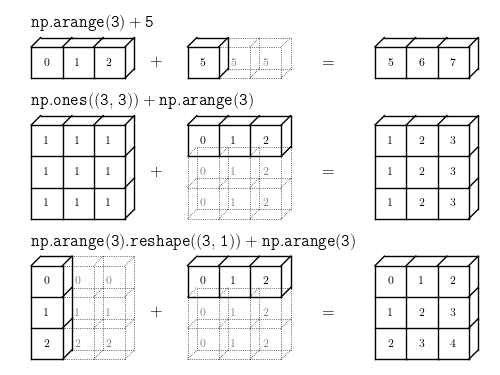

In the case of a scalar, this means the scalar is replicated out $n$ times to match the length of the vector. 

In [ ]:
a = 2
x = np.array([1, 2, 3])
print(f"a*x: {a*x}")

a*x: [2 4 6]


Another example would be applying a vector across a matrix.

In [ ]:
A = np.array(
    [
     [1, 2, 3],
     [4, 5, 6],
     [7, 8, 9]
    ]
)
x = np.array([10, 11, 12])

print(f"A: \n{A}\n")
print(f"x: \n{x}\n")
print(f"A*x: \n{A*x}")

A: 
[[1 2 3]
 [4 5 6]
 [7 8 9]]

x: 
[10 11 12]

A*x: 
[[ 10  22  36]
 [ 40  55  72]
 [ 70  88 108]]


Lastly, we finish with an example that will trigger an error because the smaller shape cannot be broadcast to match the larger shape.

In [ ]:
A = np.array(
  [
    [1, 2, 3],
    [4, 5, 6]
  ]
)
b = np.array([7, 8])

A*b
# operands could not be broadcast together with shapes (2,3) (2,) 

ValueError: ignored

We can ensure the broadcast occurs by adding a second dimension to `b`.

In [ ]:
b = np.array([7, 8]).reshape((2,1))

A*b

array([[ 7, 14, 21],
       [32, 40, 48]])

## Tensors

Tensors represent a generic $p$-Dimensional object. If $p = 3$, the tensor would be called a cube that had (height, width, depth). In the context of Deep Learning, cubes would be used to hold the data for a _single_ **color** image's data. Color images are encoded under a Red-Green-Blue (RGB) dimensional scheme.

If $p = 4$, then it would be called a **tesseract** or **4-dimensional hypercube**. However, as dimensionality increases, e.g. $p \rightarrow \infty$ , it quickly becomes easier to call it a $p$-dimensional object or tensor of order $p$.

### Cube: $3$-dimensional object

For the first $p$-dimensional object, let's construct a cube or 3-dimensional tensor that has a depth of 4, height of 2, width of 3 or $4 \times 2 \times 3$. Unlike in other languages, NumPy places the "depth" before the height and width. Let's define each matrix inside of the cube prior to construction as:

$$\begin{align}
\mathbf{O}_{0, i, j} = \mathbf{W}_{2 \times 3} &= \lbordermatrix{0 & 1 & 2}{0 \\ 1}{
  \begin{bmatrix} 
   \color{blue}{1} & \color{orange}{3} & \color{yellow}{5} \\
   \color{pink}{2} & \color{red}{4} & \color{green}{6} \\
  \end{bmatrix}
}_{2 \times 3} \\
\mathbf{O}_{1, i, j} = \mathbf{X}_{2 \times 3} &= \lbordermatrix{0 & 1 & 2}{0 \\ 1}{
  \begin{bmatrix} 
   \color{blue}{7} & \color{orange}{8} & \color{yellow}{9} \\
   \color{pink}{10} & \color{red}{11} & \color{green}{12} \\
  \end{bmatrix}
}_{2 \times 3} \\
\mathbf{O}_{2, i, j} = \mathbf{Y}_{2 \times 3} &= \lbordermatrix{0 & 1 & 2}{0 \\ 1}{
  \begin{bmatrix} 
   \color{blue}{13} & \color{orange}{14} & \color{yellow}{15} \\
   \color{pink}{16} & \color{red}{17} & \color{green}{18} \\
  \end{bmatrix}
}_{2 \times 3} \\
\mathbf{O}_{3, i, j} = \mathbf{Z}_{2 \times 3} &= \lbordermatrix{0 & 1 & 2}{0 \\ 1}{
  \begin{bmatrix} 
   \color{blue}{19} & \color{orange}{20} & \color{yellow}{21} \\
   \color{pink}{22} & \color{red}{23} & \color{green}{24} \\
  \end{bmatrix}
}_{2 \times 3} \\
\end{align}$$

Notice, we're storing a matrix within each "slice" of the cube.


In [ ]:
# Individually construct matrices
W = np.array(
    [[1, 2, 3], [4, 5, 6]]
)
X = np.array(
    [[7, 8, 9], [10, 11, 12]]
)
Y = np.array(
    [[13, 14, 15], [16, 17, 18]]
)
Z = np.array(
    [[19, 20, 21], [22, 23, 24]]
)

# Combine matrices into cube
O = np.array(
    [
     W, # Matrix 2 x 3
     X, # Matrix 2 x 3
     Y, # Matrix 2 x 3
     Z, # Matrix 2 x 3
    ]
  )

# Another approach is to use stack
O_stacked = np.stack([W, X, Y, Z])

# Alternatively, the matrices can be directly embedded
O_inline = np.array(
    [
      [[1, 2, 3], [4, 5, 6]],       # Matrix 2 x 3
      [[7, 8, 9], [10, 11, 12]],    # Matrix 2 x 3
      [[13, 14, 15], [16, 17, 18]], # Matrix 2 x 3
      [[19, 20, 21], [22, 23, 24]]  # Matrix 2 x 3
    ]
  )

print(f"X.shape: {X.shape}")
print(f"X: \n {X} \n")

print(f"Y.shape: {Y.shape}")
print(f"Y: \n {Y} \n")

print(f"Z.shape: {Z.shape}")
print(f"Z: \n {Z} \n")

print(f"O.shape: {O.shape}")
print(f"O: \n {O}")

X.shape: (2, 3)
X: 
 [[ 7  8  9]
 [10 11 12]] 

Y.shape: (2, 3)
Y: 
 [[13 14 15]
 [16 17 18]] 

Z.shape: (2, 3)
Z: 
 [[19 20 21]
 [22 23 24]] 

O.shape: (4, 2, 3)
O: 
 [[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]

 [[13 14 15]
  [16 17 18]]

 [[19 20 21]
  [22 23 24]]]


### Tensor Arithmetic

For any two tensors $X$ and $Y$ with the same shape, we can perform the "AXPY" operation, $\alpha X + Y$, and receive a tensor of a similar shape.

In [ ]:
a = -3
x = np.ones(4)
y = np.arange(4)

ax = a * x
ax_y = a * x + y

print(f"Shape of x: {x.shape}")
print(f"Shape of y: {y.shape}")
print(f"Shape of ax: {ax.shape} \n Contents of ax: \n {ax}")
print(f"Shape of ax_y: {ax_y.shape} \n Contents of ax_y: \n {ax_y}")

Shape of x: (4,)
Shape of y: (4,)
Shape of ax: (4,) 
 Contents of ax: 
 [-3. -3. -3. -3.]
Shape of ax_y: (4,) 
 Contents of ax_y: 
 [-3. -2. -1.  0.]


## Functions for Tensors Across Axes

Two operations that are useful are summations ($\sum$) and products ($\Pi$). Both provide a view into values held within a tensor. By default, either operation will be performed across all elements or "all axes". Axes in this context refers to the dimension a tensor has. In the case of a 2-dimensional tensor or matrix, we would have:

- **Summation across all elements**

$$
\sum_{i=0}^{n-1}\sum_{j=0}^{m-1} a_{i,j} = a_{0,0} + a_{0,1} + \cdots + a_{n-1, m-1}
$$

- **Multiplication across all elements**

$$
\Pi_{i=0}^{n-1}\Pi_{j=0}^{m-1} a_{i,j} = a_{0,0} \times a_{0,1} \times \cdots \times a_{n-1,m-1}
$$

As a practical example, we would have:

$$
\mathbf{A}_{2 \times 2} = \lbordermatrix{0 & 1}{0 \\ 1}{
  \begin{bmatrix} 
   \color{blue}{1} & \color{orange}{3} \\
   \color{pink}{2} & \color{red}{4} \\
  \end{bmatrix}
}_{2 \times 2}
$$

$$
\begin{align}
\sum_{i=0}^{n-1}\sum_{j=0}^{m-1} a_{i,j} &= {\color{blue}{1}} + {\color{orange}{3}} + {\color{pink}{2}} + {\color{red}{4}} = 10 \\
\Pi_{i=0}^{n-1}\Pi_{j=0}^{m-1} a_{i,j} &= {\color{blue}{1}} \times {\color{orange}{3}} \times {\color{pink}{2}} \times {\color{red}{4}} = 24
\end{align}
$$



In [ ]:
# Construct data
A = (np.arange(4)+1).reshape((2,2))
print(f"A = \n{A}\n")

# Calculate in an element-wise fashion
sum_A = np.sum(A)
prod_A = np.prod(A)

# See results
print(f"Sum of A = {sum_A}, Product of A = {prod_A}")

A = 
[[1 2]
 [3 4]]

Sum of A = 10, Product of A = 24


The summation could also be converted quickly to an average of the matrix by dividing the summation with the total number of elements. 

$$\operatorname{mean}(\mathbf{A}) = \frac{1}{nm}\sum_{i=0}^{n-1}\sum_{j=0}^{m-1} a_{i,j} = \frac{1}{2\cdot2}\left( {\color{blue}{1}} + {\color{orange}{3}} + {\color{pink}{2}} + {\color{red}{4}} \right) = \frac{10}{4} = 2.5$$


In [ ]:
A = (np.arange(4)+1).reshape((2,2))
print(f"A: \n{A}\n")

n_elements_A = A.size
print(f"Number of Elements in A: {n_elements_A}\n")

mean_A = np.mean(A)
mean_by_sum_A = np.sum(A) / A.size

print(f"Mean of A: {mean_A}")
print(f"Mean of A by sum and elements: {mean_by_sum_A}")

A: 
[[1 2]
 [3 4]]

Number of Elements in A: 4

Mean of A: 2.5
Mean of A by sum and elements: 2.5


## Axes-specific Operations 

Alternatively, we can choose to only look at specific dimensions by iterating over the axis associated with it. The most common axis operations are row-wise (`axis = 0`) and column-wise (`axis = 1`) summations.

Let's define two operators for retrieving values in either a column or row-wise manner from the Matrix.

- Row $i$ of matrix $\mathbf{A}_{n \times m}$ is denoted by either $\operatorname{row}_{i}\left(\mathbf{A}\right)$ or $ \mathbf{A}_{i,*}$ such that: 

$$\mathbf{A}_{i,*} = [a_{i1}\>a_{i2}\>\ldots \>a_{im}]$$

- Column $j$ of matrix $\mathbf{A}_{n \times m}$ is denoted by either $\operatorname{col}_{j}\left(\mathbf{A}\right)$ or $ \mathbf{A}_{*,j}$ such that:

$$\mathbf{A}_{*,j} = \left[\matrix{a_{1j}\cr a_{2j}\cr\vdots\cr a_{nj}\cr}\right]\ .$$




When talking about **row-wise** operations, we're describing action on **all rows** for **each column**.

$$
\mathbf{A}_{4 \times 4} = \lbordermatrix{
    % Columns
    \highlightcolor{lightblue}{0}\hphantom{{0}} & 
    \highlightcolor{orange}{1}   \hphantom{{0}} & 
    \highlightcolor{lightgrey}{2}\hphantom{{0}} & 
    \highlightcolor{pink}{3}     \hphantom{{0}}
  }{
    % rows
    0 \\ 1 \\ 2 \\ 3
  }{
  \begin{bmatrix} 
   \highlightcolor{lightblue}{a_{00}} & \highlightcolor{orange}{a_{01}} & \highlightcolor{lightgrey}{a_{02}} & \highlightcolor{pink}{a_{03}} \\
   \highlightcolor{lightblue}{a_{10}} & \highlightcolor{orange}{a_{11}} & \highlightcolor{lightgrey}{a_{12}} & \highlightcolor{pink}{a_{13}} \\ 
   \highlightcolor{lightblue}{a_{20}} & \highlightcolor{orange}{a_{21}} & \highlightcolor{lightgrey}{a_{22}} & \highlightcolor{pink}{a_{23}} \\
   \highlightcolor{lightblue}{a_{30}} & \highlightcolor{orange}{a_{31}} & \highlightcolor{lightgrey}{a_{32}} & \highlightcolor{pink}{a_{33}} 
  \end{bmatrix}
}_{4 \times 4}
$$



If we were to take a row-wise summation, we would get: 

$$
\begin{align}
c_j &= \sum_{i=0}^{n-1} \operatorname{col}_{j}(A) \\
&= \sum_{i=0}^{n-1} a_{i,j} = 
a_{0,j} + a_{1, j} + \cdots + a_{n-1, j} \\
&= \lbordermatrix{
    % Columns
    \hphantom{0}\highlightcolor{lightblue}{j = 0}\hphantom{000000} & 
    \hphantom{000000}\highlightcolor{orange}{j = 1}   \hphantom{00000} & 
    \hphantom{000000}\highlightcolor{lightgrey}{j = 2}\hphantom{00000} & 
    \hphantom{00000000}\highlightcolor{pink}{j = 3}     \hphantom{0}
  }{
    % rows
    0 
  }{
  \begin{bmatrix} 
   \highlightcolor{lightblue}{a_{00} + a_{10} + a_{30} + a_{30}} & \highlightcolor{orange}{a_{01} + a_{11} + a_{21} + a_{31}} & \highlightcolor{lightgrey}{a_{02} + a_{12} + a_{22} + a_{32}} & \highlightcolor{pink}{a_{03} + a_{13} + a_{23} + a_{33}} \\
  \end{bmatrix}
}_{1 \times 4}
\end{align}
$$



For **column-wise** operations, the action takes place on **all columns** for **each row**. 

$$
\mathbf{A}_{4 \times 4} = \lbordermatrix{
  % columns
  0\hphantom{{00}} & 
  \hphantom{{0}}1 & 
  \hphantom{{00}}2\hphantom{{0}} & 
  \hphantom{{0}}3\hphantom{{0}}
  }{
    % rows
    \highlightcolor{Orchid}{0} \\
    \highlightcolor{Goldenrod}{1} \\ 
    \highlightcolor{Melon}{2} \\ 
    \highlightcolor{Aquamarine}{3}}{
  % Annotated matrix
  \begin{bmatrix} 
   \highlightcolor{Orchid}{a_{00}} & \highlightcolor{Orchid}{a_{01}} & \highlightcolor{Orchid}{a_{02}} & \highlightcolor{Orchid}{a_{03}} \\
   \highlightcolor{Goldenrod}{a_{10}} & \highlightcolor{Goldenrod}{a_{11}} & \highlightcolor{Goldenrod}{a_{12}} & \highlightcolor{Goldenrod}{a_{13}} \\ 
   \highlightcolor{Melon}{a_{20}} & \highlightcolor{Melon}{a_{21}} & \highlightcolor{Melon}{a_{22}} & \highlightcolor{Melon}{a_{23}} \\
   \highlightcolor{Aquamarine}{a_{30}} & \highlightcolor{Aquamarine}{a_{31}} & \highlightcolor{Aquamarine}{a_{32}} & \highlightcolor{Aquamarine}{a_{33}} 
  \end{bmatrix}
}_{4 \times 4}
$$

If we were to take a **column-wise** summation, we would get: 

$$
\begin{align}
r_i &= \sum_{j=0}^{m-1} \operatorname{row}_{i}(A) \\
&= \sum_{j=0}^{m-1} a_{i,j} = 
a_{i,0} + a_{i, 1} + \cdots + a_{i, m-1} \\
&= \lbordermatrix{
    % Columns
    0
  }{
    % rows
    \highlightcolor{Orchid}{j = 0} \\
    \highlightcolor{Goldenrod}{j = 1}    \\
    \highlightcolor{Melon}{j = 2} \\
    \highlightcolor{Aquamarine}{j = 3}   
  }{
  \begin{bmatrix} 
   \highlightcolor{Orchid}{a_{00} + a_{01} + a_{02} + a_{03}} \\
   \highlightcolor{Goldenrod}{a_{10} + a_{11} + a_{12} + a_{13}} \\
   \highlightcolor{Melon}{a_{20} + a_{21} + a_{22} + a_{23}} \\
   \highlightcolor{Aquamarine}{a_{30} + a_{31} + a_{32} + a_{33}} 
  \end{bmatrix}
}_{4 \times 1}
\end{align}
$$


For an example of row and column-wise summation, let's examine the following matrix:

$$
\mathbf{A}_{3 \times 2} = \lbordermatrix{0 & 1}{0 \\ 1 \\ 2}{
  \begin{bmatrix} 
   1 & 2 \\
   3 & 4 \\
   5 & 6 \\
  \end{bmatrix}
}_{3 \times 2}$$

If we perform a **row-wise** summation, this would give the total value for **each column**: 

$$
 \mathbf{A}_{3 \times 2} = \lbordermatrix{\highlightcolor{lightblue}{0} & \highlightcolor{orange}{1}}{0 \\ 1 \\ 2}{
  \begin{bmatrix} 
   \highlightcolor{lightblue}{1} & \highlightcolor{orange}{2} \\
   \highlightcolor{lightblue}{3} & \highlightcolor{orange}{4} \\
   \highlightcolor{lightblue}{5} & \highlightcolor{orange}{6} \\
  \end{bmatrix}
}_{3 \times 2}$$

$$
\begin{align}
c_0 &= \sum_{i=0}^{n-1} \operatorname{col}_{0}(\mathbf{A}) = 1 + 3 + 5 = \highlightcolor{lightblue}{9}\\
c_1 &= \sum_{i=0}^{n-1} \operatorname{col}_{1}(\mathbf{A}) = 2 + 4 + 6 = \highlightcolor{orange}{12}\\
\end{align}
$$

If we perform a **column-wise** summation, this would give the total value for **each row**: 

$$
 \mathbf{A}_{3 \times 2} = \lbordermatrix{0 & 1}{
   \highlightcolor{Orchid}{0} \\ 
   \highlightcolor{Goldenrod}{1} \\
   \highlightcolor{Melon}{2}
  }{
  \begin{bmatrix} 
   \highlightcolor{Orchid}{1} & \highlightcolor{Orchid}{2} \\
   \highlightcolor{Goldenrod}{3} & \highlightcolor{Goldenrod}{4} \\
   \highlightcolor{Melon}{5} & \highlightcolor{Melon}{6} \\
  \end{bmatrix}
}_{3 \times 2}$$

$$
\begin{align}
r_0 &= \sum_{j=0}^{m-1} \operatorname{row}_{0}(\mathbf{A}) = 1 + 2 = \highlightcolor{Orchid}{9}\\
r_1 &= \sum_{j=0}^{m-1} \operatorname{row}_{1}(\mathbf{A}) = 3 + 4 = \highlightcolor{Goldenrod}{7}\\
r_2 &= \sum_{j=0}^{m-1} \operatorname{row}_{1}(\mathbf{A}) = 5 + 6 = \highlightcolor{Melon}{11}\\
\end{align}
$$

In [ ]:
A = (np.arange(6)+1).reshape((3,2))
print(f"A: \n{A}\n")

A_col_sum = np.sum(A, axis = 0)
print(f"Column sum of A is A_{{:, j}}\n{A_col_sum}\n")

A_row_sum = np.sum(A, axis = 1)
print(f"Row sum of A is A_{{i, :}}\n{A_row_sum.reshape((3,1))}\n")

A_row_column_sum = np.sum(A, axis = (0, 1))
print(f"Across Row and Column sums of A is A_{{:, :}}\n{A_row_column_sum}")

A: 
[[1 2]
 [3 4]
 [5 6]]

Column sum of A is A_{:, j}
[ 9 12]

Row sum of A is A_{i, :}
[[ 3]
 [ 7]
 [11]]

Across Row and Column sums of A is A_{:, :}
21


One point of interest is what happens when summing across both Row and Column 
values. 

In [ ]:
A_sum = np.sum(A)
print(f"Sum of A is A_{{:, :}}\n{A_sum}")

A_row_column_sum = np.sum(A, axis = (0, 1))
print(f"Across Row and Column sums of A is A_{{:, :}}\n{A_row_column_sum}")

Sum of A is A_{:, :}
21
Across Row and Column sums of A is A_{:, :}
21


## Norms


Norms are ways of measuring how large a matrices elements are. Usually, norms are used when comparing an estimated value with a true value. Consider the $p$-norm or $\ell_p$ of a vector $\mathbf{x}$ given as 
$$\lVert \mathbf{x}\rVert_p = \left({\sum_{i=1}^{n} \lvert{ x_i^p}\rvert} \right)^{1/p} = \left({ \lvert{ x_1^p}\rvert + \lvert{ x_2^p}\rvert + \cdots + \lvert{ x_n^p}\rvert }\right)^{1/p},$$

where $p$ is a real number such that $p \ge 1$, $x_i$ refers to the $i$th location in vector $x$, and $\lvert x_i \rvert$ is absolute value of $x$ at element $i$.

In the case of the $\ell_1$ and $\ell_2$ norms, we have:

$$\begin{align}
\lVert \mathbf{x}\rVert_1 &= \sum_{i=1}^{n} \lvert{ x_i^p}\rvert = \left({ \lvert{ x_1}\rvert + \lvert{ x_2}\rvert + \cdots + \lvert{ x_n}\rvert }\right) \\
\lVert \mathbf{x}\rVert_2 &= \left({\sum_{i=1}^{n} \lvert{ x_i^2}\rvert} \right)^{1/2} = \left({ \lvert{ x_1^2}\rvert + \lvert{ x_2^2}\rvert + \cdots + \lvert{ x_n^2}\rvert }\right)^{1/2} = \sqrt{ \lvert{ x_1^2}\rvert + \lvert{ x_2^2}\rvert + \cdots + \lvert{ x_n^2}\rvert }
\end{align}$$


### Calculating a Norm

Norms can be calculated using built-in NumPy functions or by writing custom expressions. In particular, the $\ell_1$ norm, is obtained with:

In [ ]:
# Built-in L_1 norm
l1_norm_numpy = np.linalg.norm(x[:,np.newaxis], 1)

# Custom calculation with NumPy
l1_norm_custom = np.sum(np.abs(x))

# L1-norms
print(f"L_1 norm built-in: {l1_norm_numpy} \n")
print(f"L_1 norm custom: {l1_norm_custom} \n")

L_1 norm built-in: 4.0 

L_1 norm custom: 4.0 



To calculate the $\ell_2$-norm, use:

In [ ]:
# Built-in
l2_norm_numpy = np.linalg.norm(x[:,np.newaxis], 'fro')

# or a custom calculation with NumPy
l2_norm_custom = np.sqrt(np.sum(np.power(np.abs(x), 2)))

print(f"L_2 norm built-in: {l2_norm_numpy} \n")
print(f"L_2 norm custom: {l2_norm_custom} \n")

L_2 norm built-in: 2.0 

L_2 norm custom: 2.0 



#### Your Turn: Norm Parity

When taking a norm, is the absolute value always required regardless of $\ell_p$?

----

answer here 

--- 